In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the dataset
train_df = pd.read_csv('train.csv')

In [7]:
# Select relevant features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

In [9]:
# Drop rows with missing values in selected features
df = train_df[features + [target]].dropna()


In [11]:
# Split the data into training and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
# Predict on the test set
y_pred = model.predict(X_test)


In [17]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 2810942965.2180653
Root Mean Squared Error (RMSE): 53018.32669198515
R² Score: 0.6335301929422245


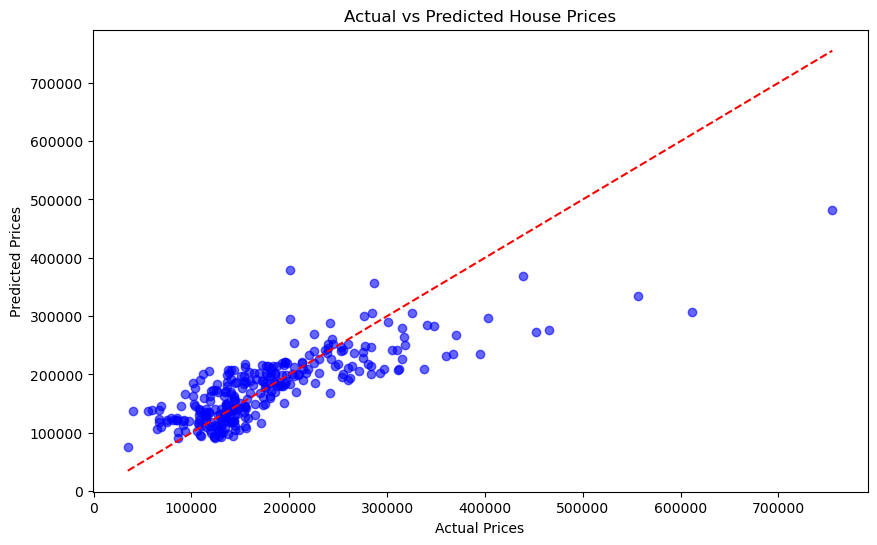

In [21]:
# Visualization: Actual vs Predicted prices
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


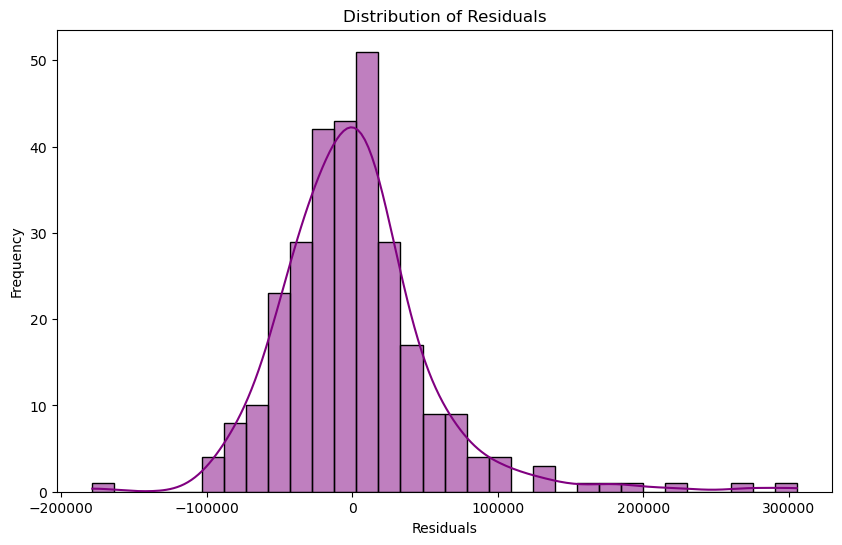

In [25]:
# Visualization: Residuals
import seaborn as sns
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()